In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('seaborn')
sns.set(font_scale=1.5)

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import missingno as msno # 결측치 확인 라이브러리

In [2]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data

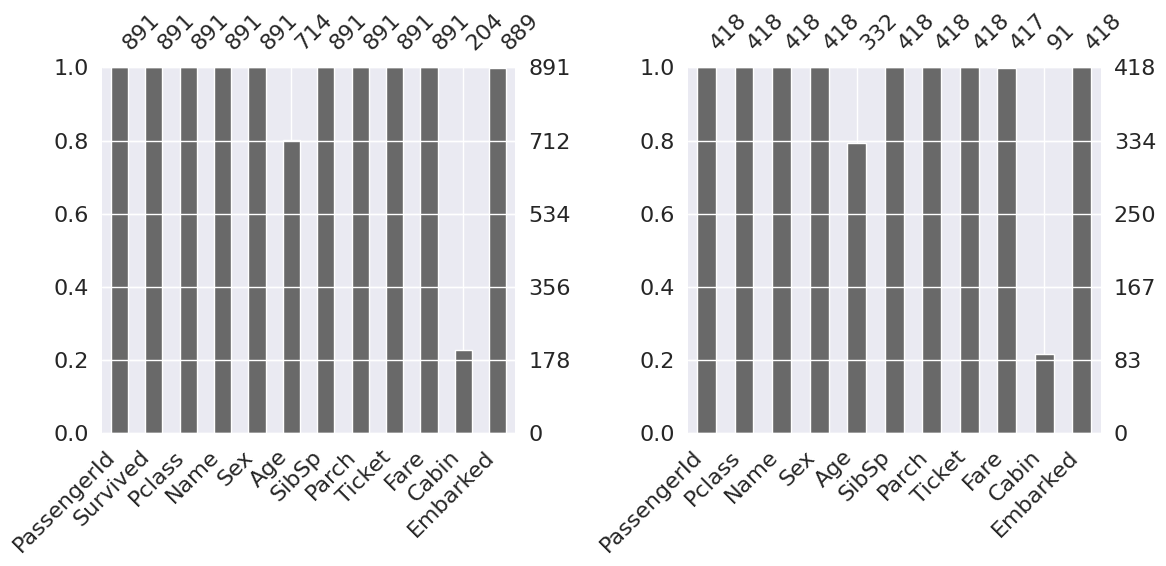

In [4]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
msno.bar(df=df_train, ax=ax[0])
msno.bar(df=df_test, ax=ax[1])
plt.tight_layout()
plt.show()

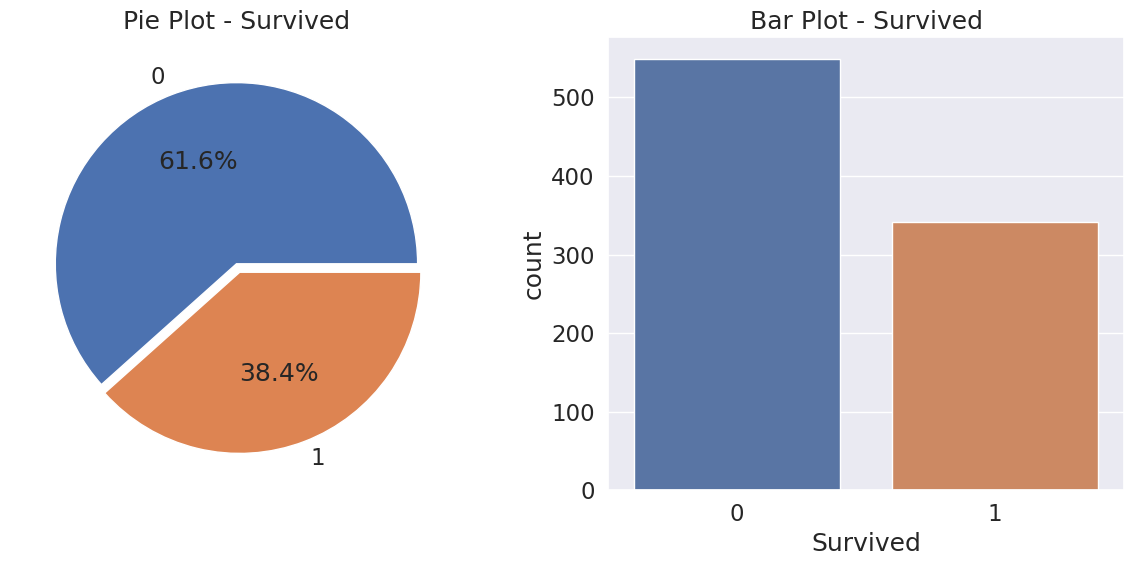

In [5]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
df_train["Survived"].value_counts().plot.pie(explode=[0,0.05], autopct="%.1f%%", ax=ax[0])

ax[0].set_title("Pie Plot - Survived")
ax[0].set_ylabel("")

sns.countplot(df_train, x='Survived', ax=ax[1])
ax[1].set_title("Bar Plot - Survived")

plt.tight_layout()
plt.show()

## Pclass

In [6]:
pd.crosstab(df_train["Pclass"], df_train["Survived"], normalize="index").style.background_gradient(cmap="summer_r")

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


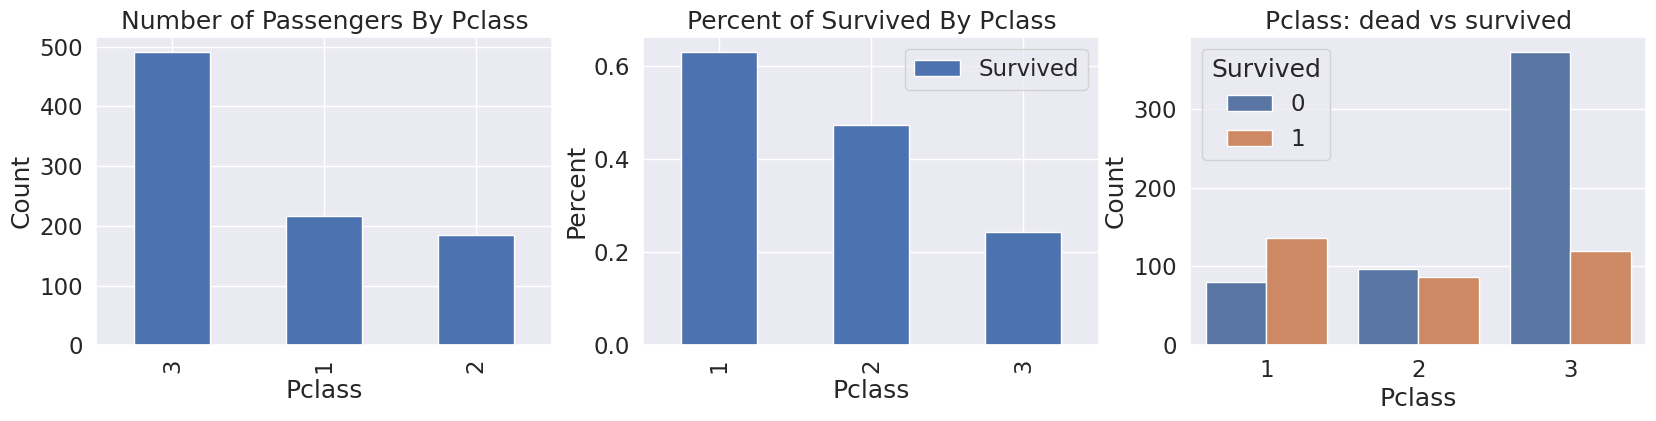

In [7]:
fig, ax = plt.subplots(1,3,figsize=(20,4))

df_train["Pclass"].value_counts().plot.bar(ax=ax[0])
ax[0].set_title("Number of Passengers By Pclass")
ax[0].set_ylabel("Count")


df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean().sort_values(by="Survived", ascending=False).plot.bar(ax=ax[1])
ax[1].set_title("Percent of Survived By Pclass")
ax[1].set_ylabel("Percent")


sns.countplot(df_train, x="Pclass", hue="Survived", ax=ax[2])
ax[2].set_title("Pclass: dead vs survived")
ax[2].set_ylabel("Count")
plt.show()

## sex

In [8]:
pd.crosstab(df_train["Pclass"], df_train["Survived"], normalize="index").style.background_gradient(cmap="summer_r")

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


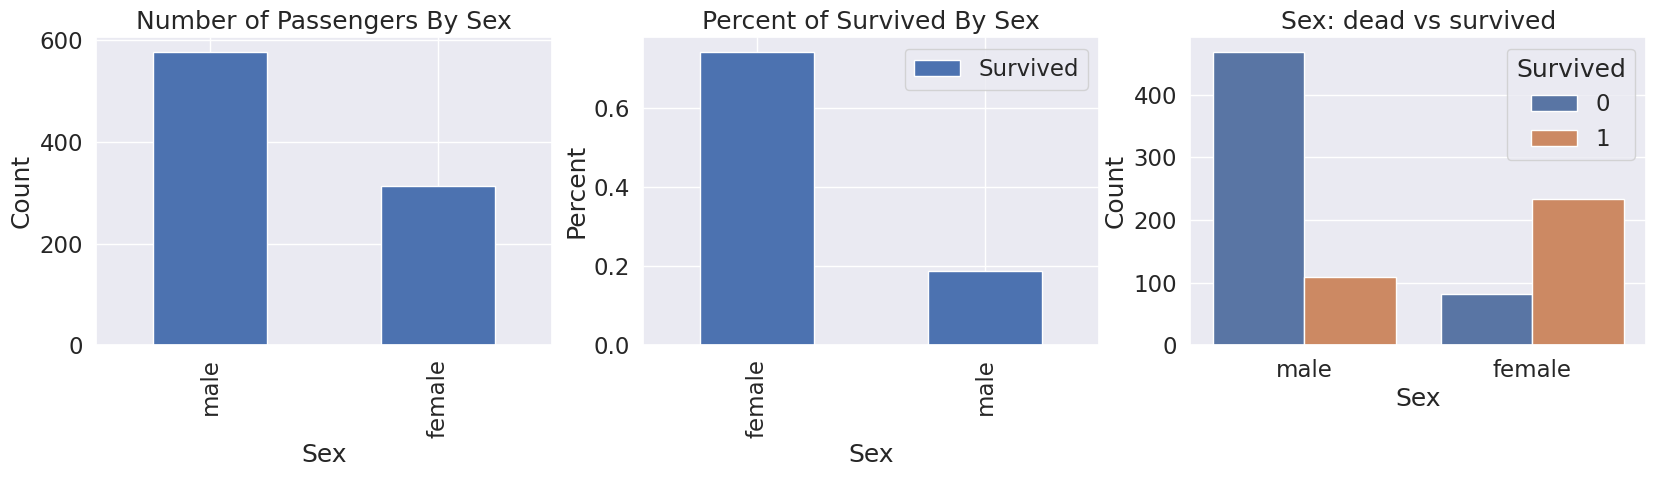

In [9]:
fig, ax = plt.subplots(1,3,figsize=(20,4))

df_train["Sex"].value_counts().plot.bar(ax=ax[0])
ax[0].set_title("Number of Passengers By Sex")
ax[0].set_ylabel("Count")


df_train[["Sex", "Survived"]].groupby(["Sex"], as_index=True).mean().sort_values(by="Survived", ascending=False).plot.bar(ax=ax[1])
ax[1].set_title("Percent of Survived By Sex")
ax[1].set_ylabel("Percent")


sns.countplot(df_train, x="Sex", hue="Survived", ax=ax[2])
ax[2].set_title("Sex: dead vs survived")
ax[2].set_ylabel("Count")
plt.show()

## Pclass & Sex

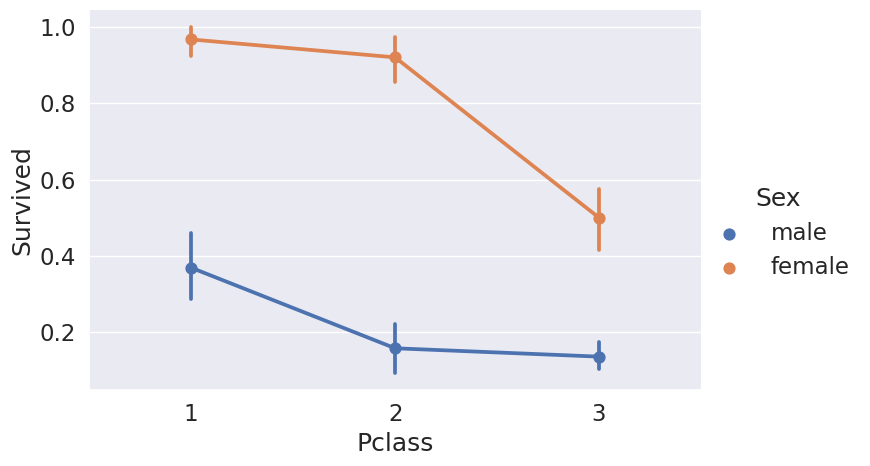

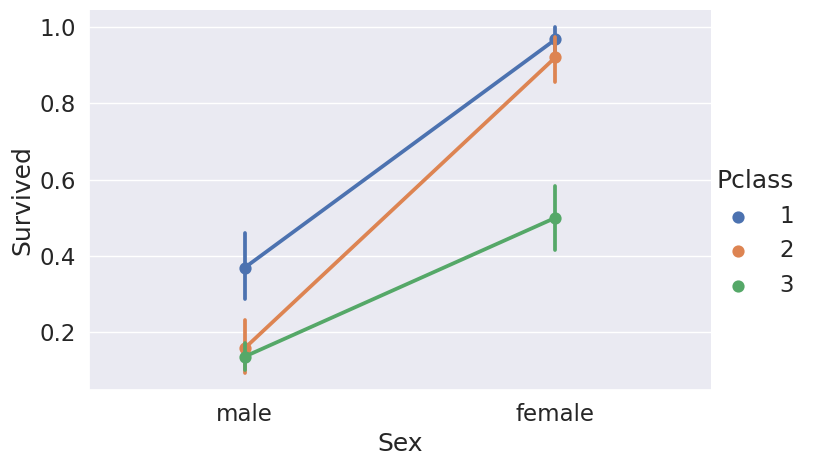

In [10]:
sns.catplot(df_train, x="Pclass", y="Survived", hue="Sex", kind="point", aspect=1.5)
sns.catplot(df_train, x="Sex", y="Survived", hue="Pclass", kind="point", aspect=1.5)


## age

In [11]:
df_train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

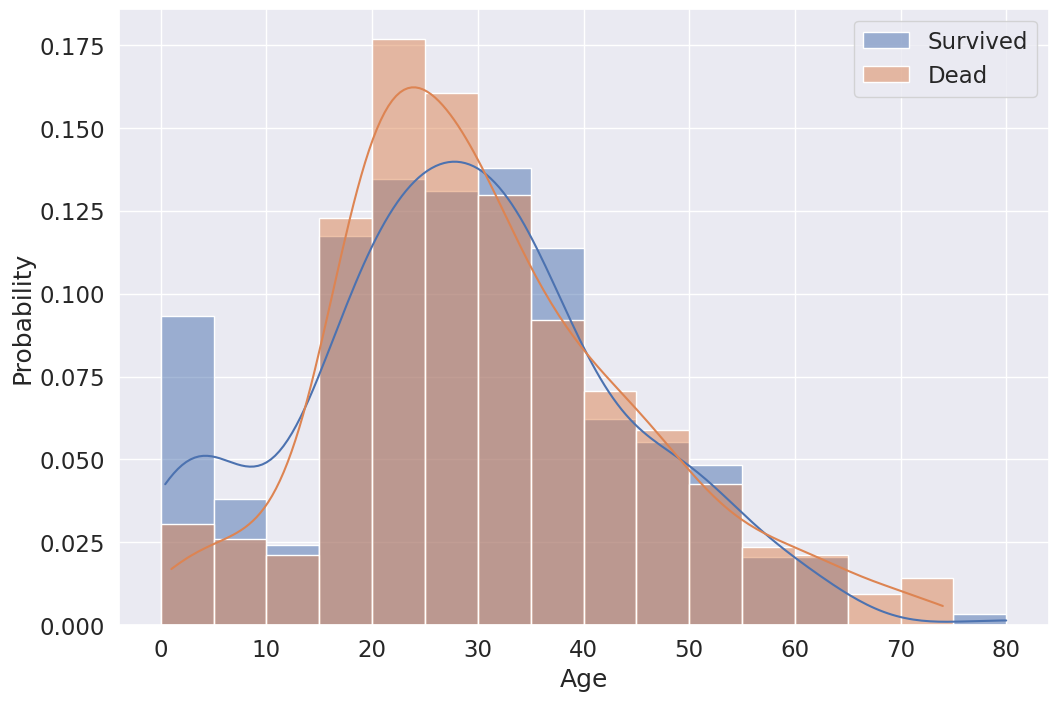

In [12]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.histplot(df_train[df_train["Survived"]==1]["Age"], stat="probability", binwidth=5, binrange=(0,80), kde=True, label="Survived", ax=ax)
sns.histplot(df_train[df_train["Survived"]==0]["Age"], stat="probability", binwidth=5, binrange=(0,80), kde=True, label="Dead", ax=ax)
plt.legend()
plt.show()

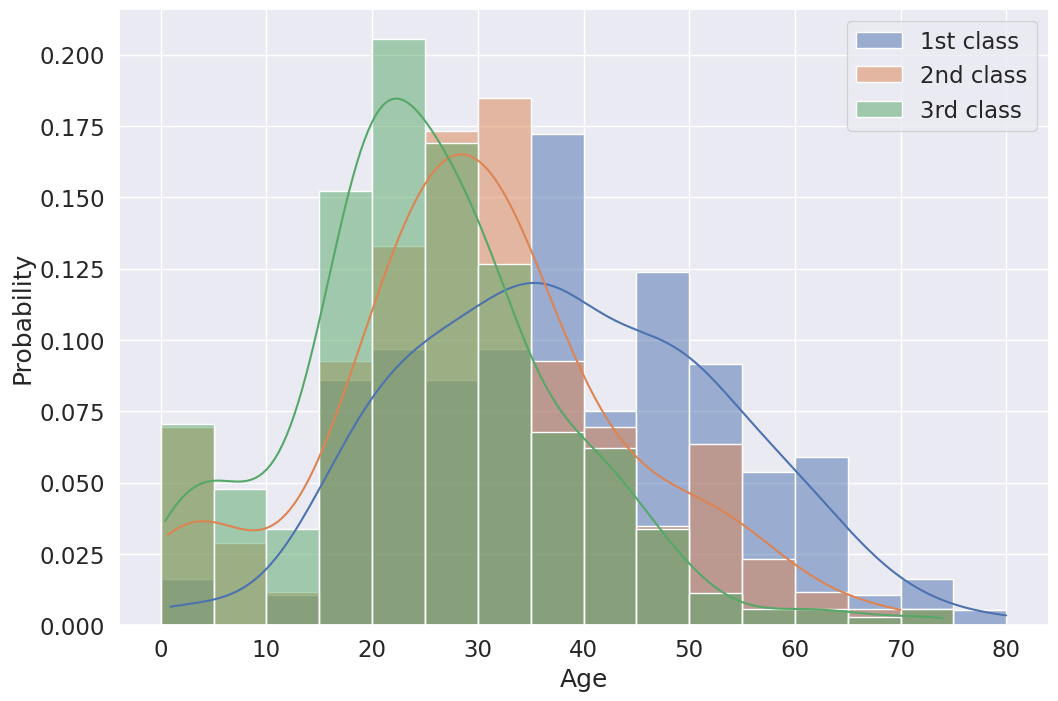

In [13]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.histplot(df_train[df_train["Pclass"]==1]["Age"], stat="probability", binwidth=5, binrange=(0,80), kde=True, label="1st class", ax=ax)
sns.histplot(df_train[df_train["Pclass"]==2]["Age"], stat="probability", binwidth=5, binrange=(0,80), kde=True, label="2nd class", ax=ax)
sns.histplot(df_train[df_train["Pclass"]==3]["Age"], stat="probability", binwidth=5, binrange=(0,80), kde=True, label="3rd class", ax=ax)
plt.legend()
plt.show()

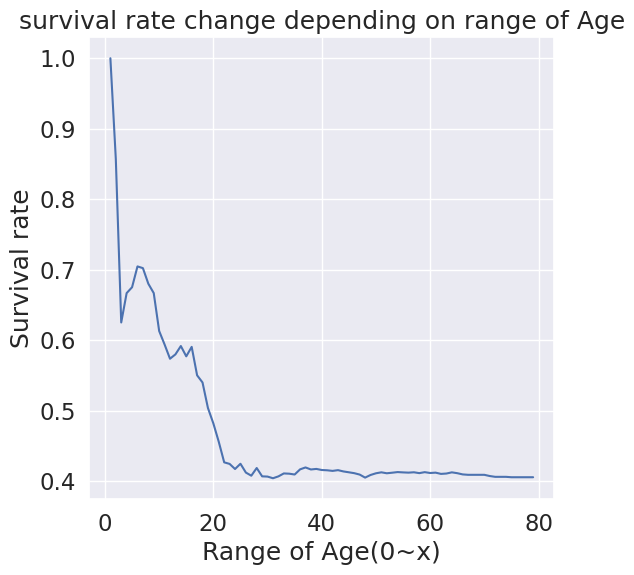

In [14]:
# 중요
# 나이대가 변해가면서 생존률이 어떻게 변하는 확인
cummulate_survival_ratio = []
for i in range(80):
    tmp = df_train[df_train["Age"]<i]["Survived"]
    cummulate_survival_ratio.append(tmp.sum() / len(tmp))

plt.figure(figsize=(6,6))
plt.plot(cummulate_survival_ratio)
plt.title("survival rate change depending on range of Age")
plt.ylabel("Survival rate")
plt.xlabel("Range of Age(0~x)")
plt.show()

## Pclass & Sex & Age

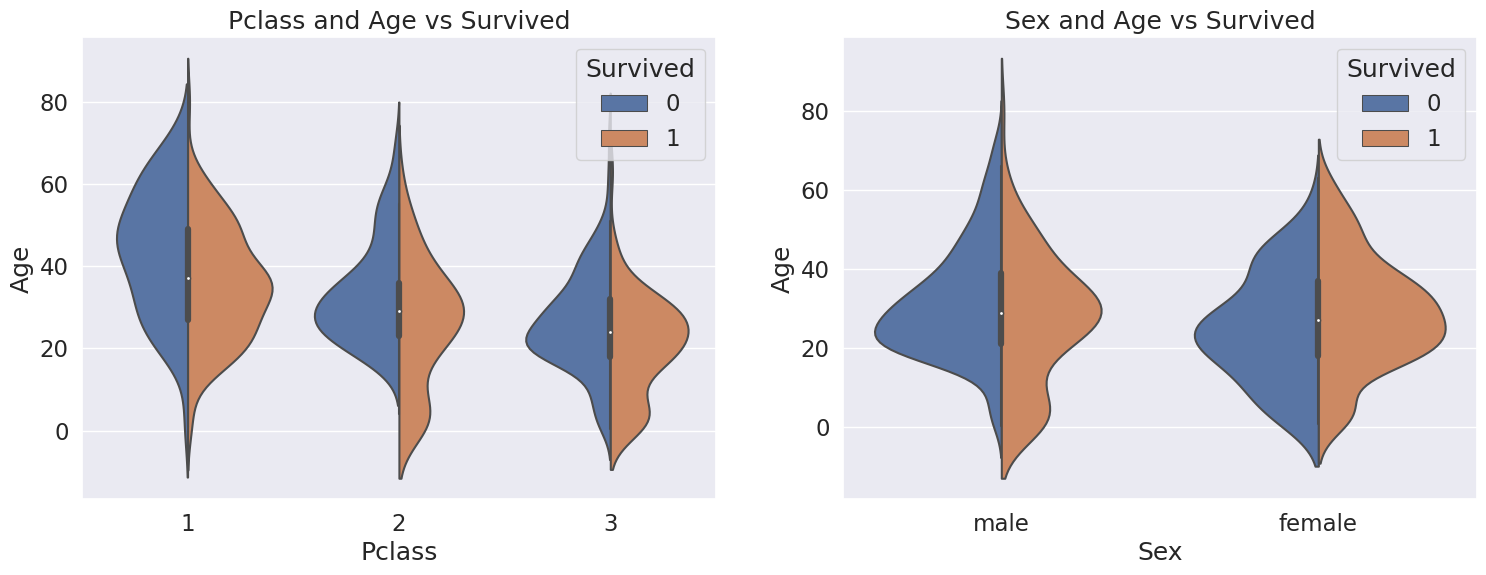

In [15]:
fig, ax = plt.subplots(1,2, figsize=(18,6))

sns.violinplot(df_train, x="Pclass", y="Age", hue="Survived", density_norm="count", split=True, ax=ax[0])
sns.violinplot(df_train, x="Sex", y="Age", hue="Survived", density_norm="count", split=True, ax=ax[1])

ax[0].set_title("Pclass and Age vs Survived")
ax[1].set_title("Sex and Age vs Survived")

plt.show()

### embarked

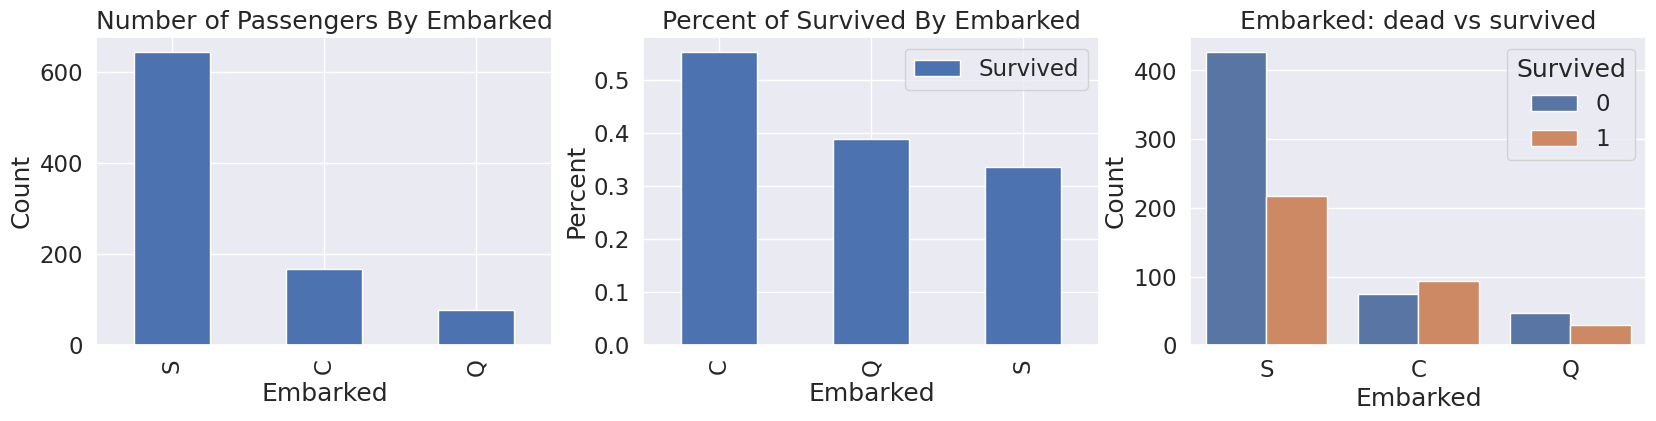

In [16]:
fig, ax = plt.subplots(1,3,figsize=(20,4))

df_train["Embarked"].value_counts().plot.bar(ax=ax[0])
ax[0].set_title("Number of Passengers By Embarked")
ax[0].set_ylabel("Count")


df_train[["Embarked", "Survived"]].groupby(["Embarked"], as_index=True).mean().sort_values(by="Survived", ascending=False).plot.bar(ax=ax[1])
ax[1].set_title("Percent of Survived By Embarked")
ax[1].set_ylabel("Percent")


sns.countplot(df_train, x="Embarked", hue="Survived", ax=ax[2])
ax[2].set_title("Embarked: dead vs survived")
ax[2].set_ylabel("Count")
plt.show()

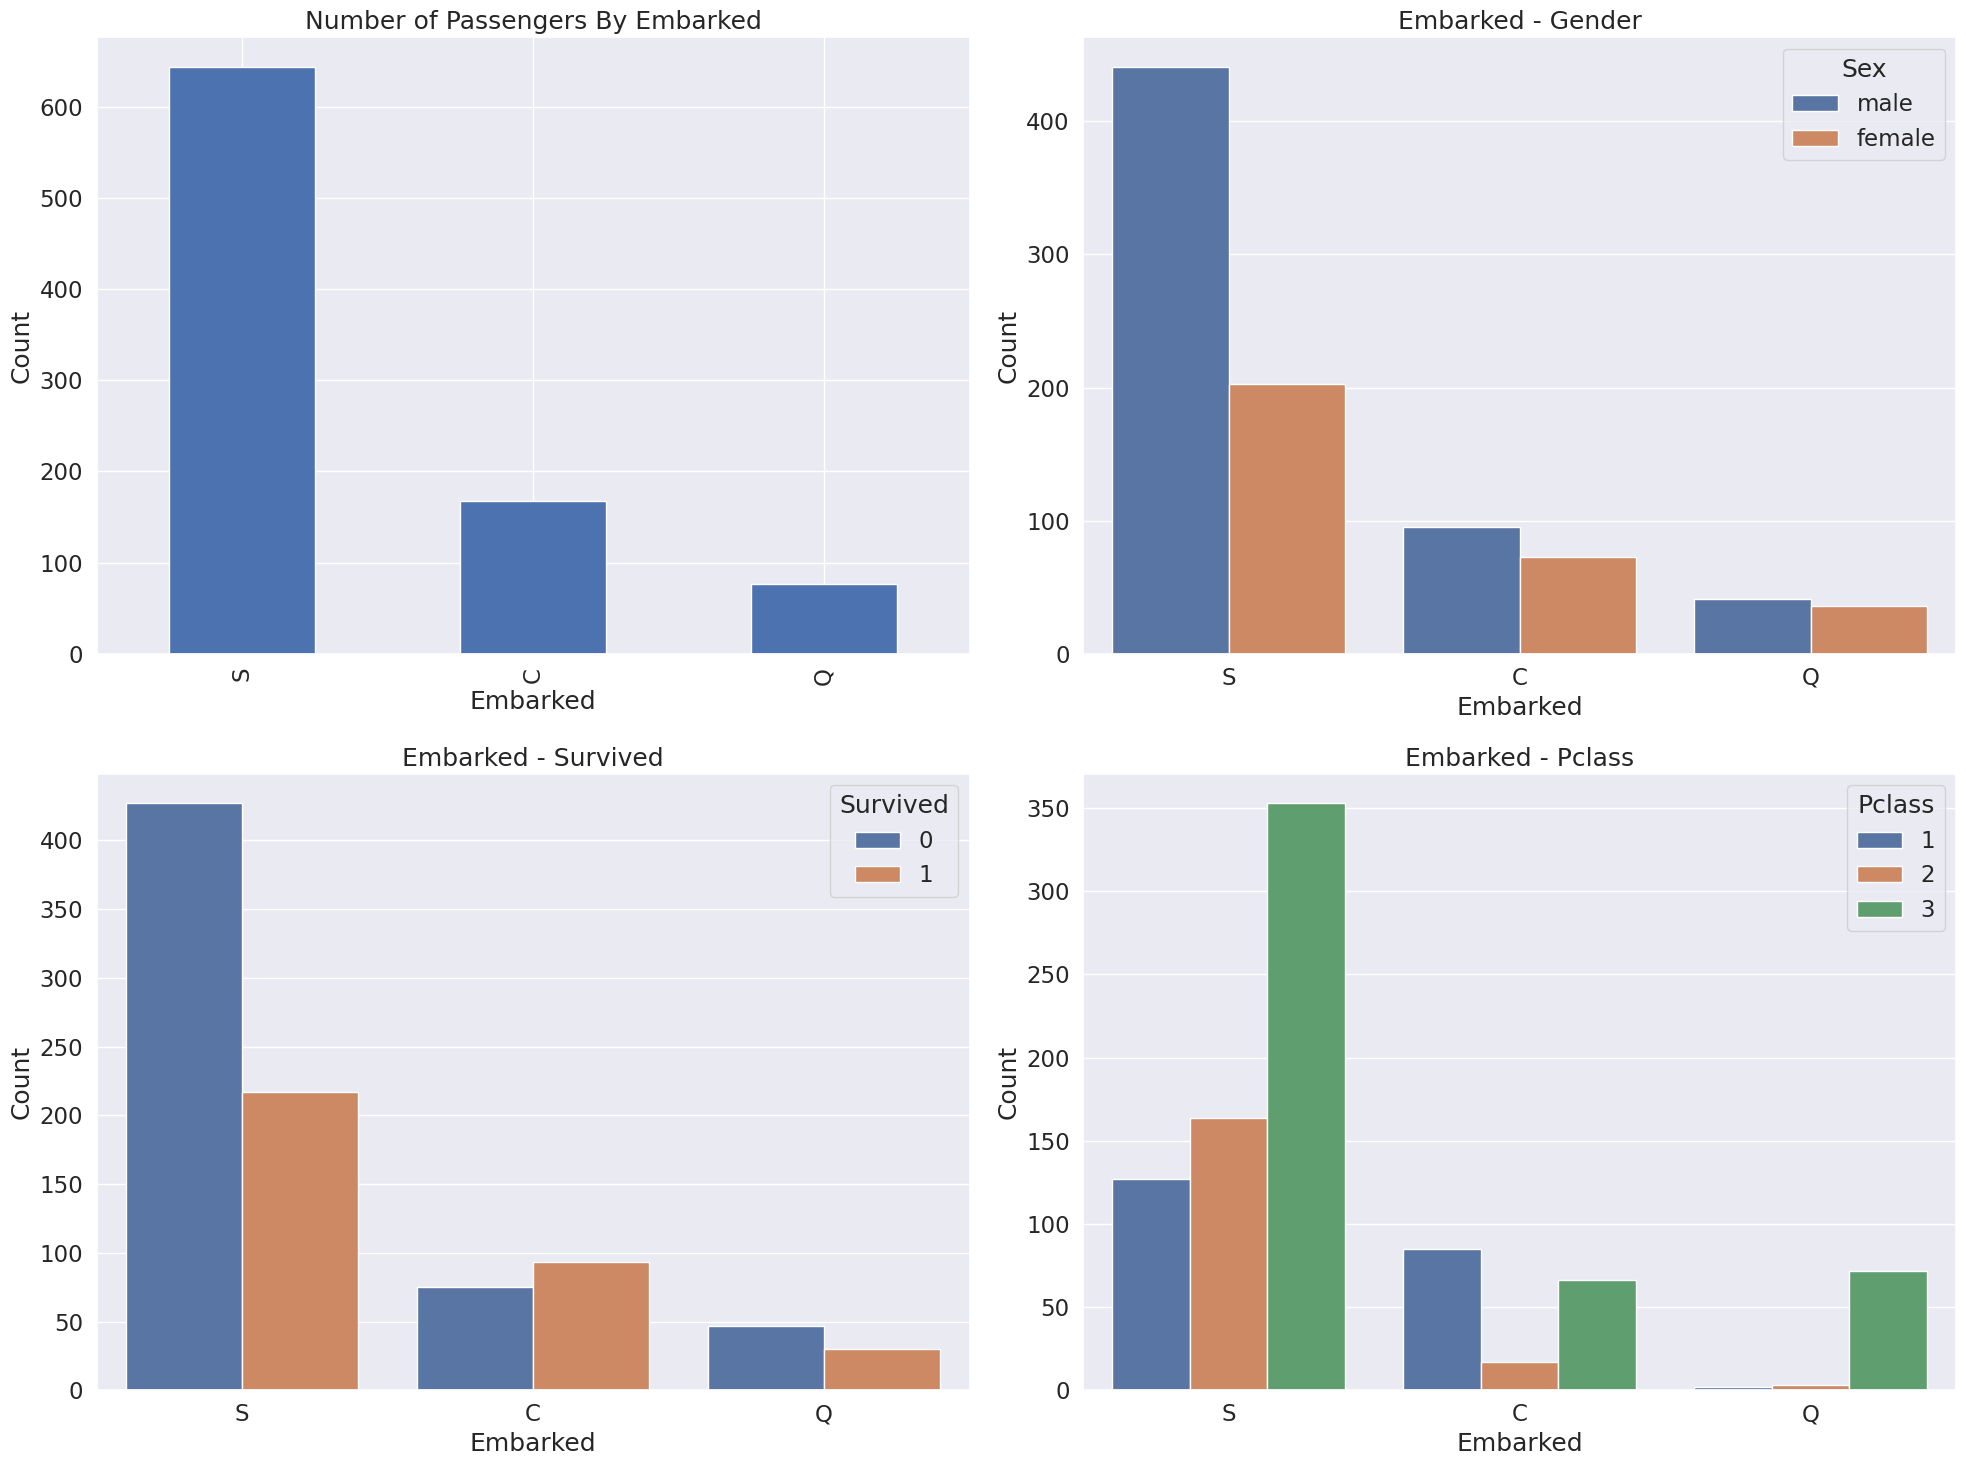

In [17]:
fig, ax = plt.subplots(2,2,figsize=(20,15))

df_train["Embarked"].value_counts().plot.bar(ax=ax[0][0])
ax[0][0].set_title("Number of Passengers By Embarked")
ax[0][0].set_ylabel("Count")

sns.countplot(df_train, x="Embarked", hue="Sex", ax=ax[0][1])
ax[0][1].set_title("Embarked - Gender")
ax[0][1].set_ylabel("Count")

sns.countplot(df_train, x="Embarked", hue="Survived", ax=ax[1][0])
ax[1][0].set_title("Embarked - Survived")
ax[1][0].set_ylabel("Count")

sns.countplot(df_train, x="Embarked", hue="Pclass", ax=ax[1][1])
ax[1][1].set_title("Embarked - Pclass")
ax[1][1].set_ylabel("Count")

plt.tight_layout()
plt.show()

## Family

In [18]:
df_train["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1
df_test["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1

In [19]:
df_train["FamilySize"].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

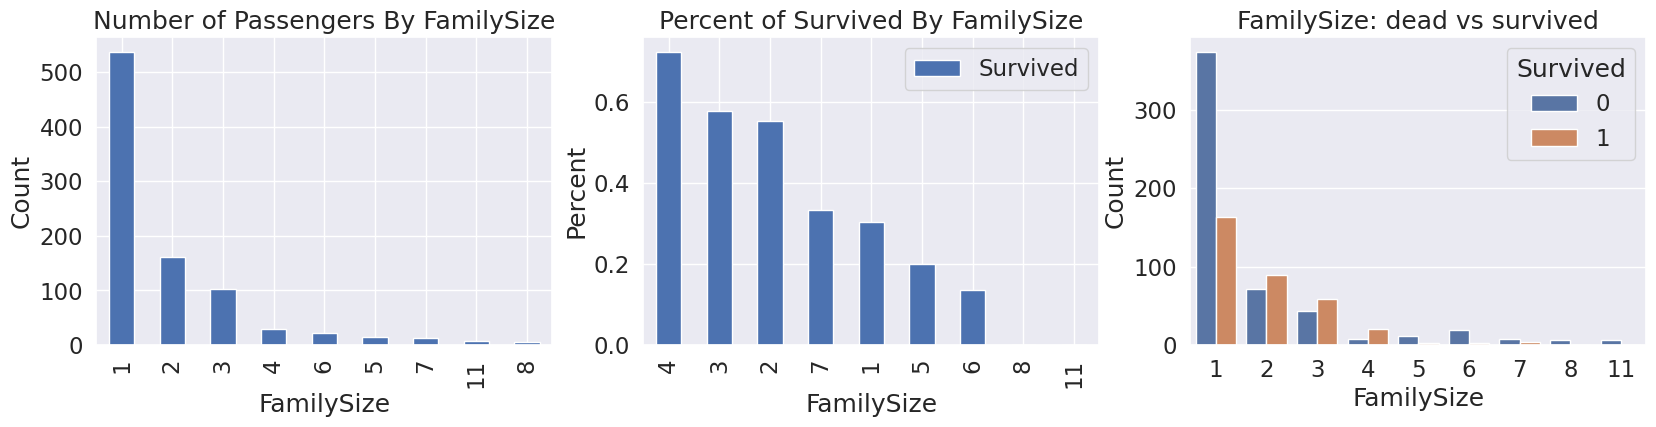

In [20]:
fig, ax = plt.subplots(1,3,figsize=(20,4))

df_train["FamilySize"].value_counts().plot.bar(ax=ax[0])
ax[0].set_title("Number of Passengers By FamilySize")
ax[0].set_ylabel("Count")


df_train[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index=True).mean().sort_values(by="Survived", ascending=False).plot.bar(ax=ax[1])
ax[1].set_title("Percent of Survived By FamilySize")
ax[1].set_ylabel("Percent")


sns.countplot(df_train, x="FamilySize", hue="Survived", ax=ax[2])
ax[2].set_title("FamilySize: dead vs survived")
ax[2].set_ylabel("Count")
plt.show()

## fare

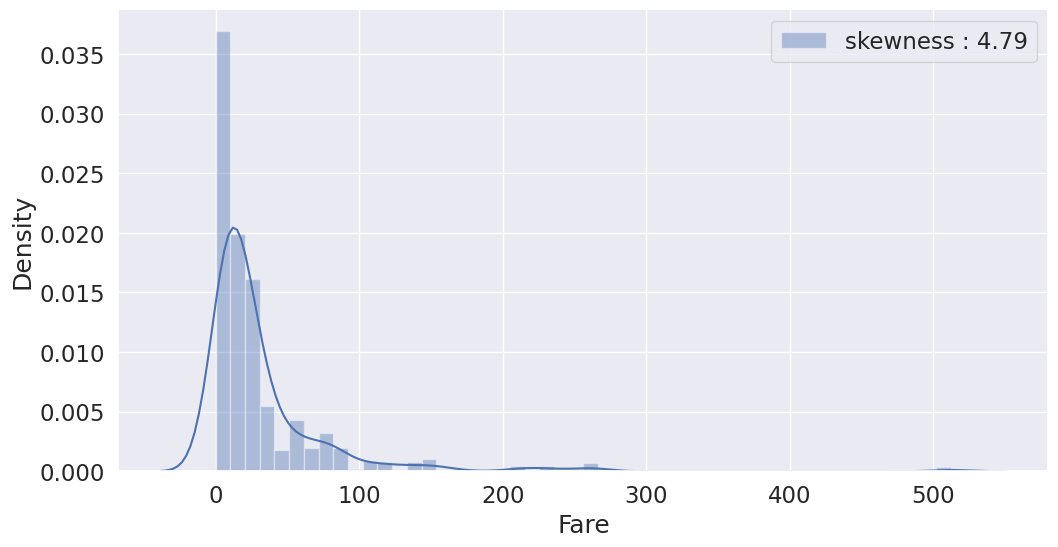

In [21]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
g = sns.distplot(df_train["Fare"], label="skewness : {:.2f}".format(df_train["Fare"].skew(), ax=ax))
g=g.legend(loc='best')

### missing fare in test

In [22]:
df_test.loc[df_test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,1


In [23]:
median_fee = df_train[(df_train["Pclass"]==3) & (df_train["Embarked"]=="S") & (df_train["FamilySize"]==1)]["Fare"].describe()["50%"]

df_test.loc[df_test.Fare.isnull(), 'Fare'] = median_fee

df_train["Fare"] = df_train["Fare"].map(lambda i:np.log(i) if i > 0 else 0)
df_test["Fare"] = df_test["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

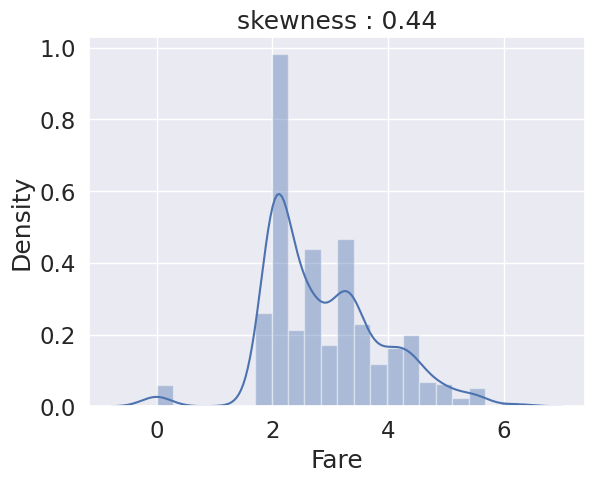

In [24]:
sns.distplot(df_train["Fare"])
plt.title("skewness : {:.2f}".format(df_train["Fare"].skew()))
plt.show()

## cabin

In [25]:
df_train["Cabin"].isna().mean()

0.7710437710437711

## ticket

In [26]:
df_train["Ticket"].isna().mean()

0.0

# Feature Engineering

## fill missing Age using Name

In [27]:
# alphabet + . 양식으로 구성된 string 추출
df_train["Initial"] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test["Initial"] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [28]:
pd.crosstab(df_train["Initial"], df_train["Sex"]).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [29]:
df_train["Initial"].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test["Initial"].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [30]:
pd.crosstab(df_train["Initial"], df_train["Sex"]).T

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [31]:
pd.crosstab(df_test["Initial"], df_test["Sex"]).T

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,79,1,72,0
male,21,0,241,0,4


In [32]:
df_train.groupby("Initial").mean(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<Axes: xlabel='Initial'>

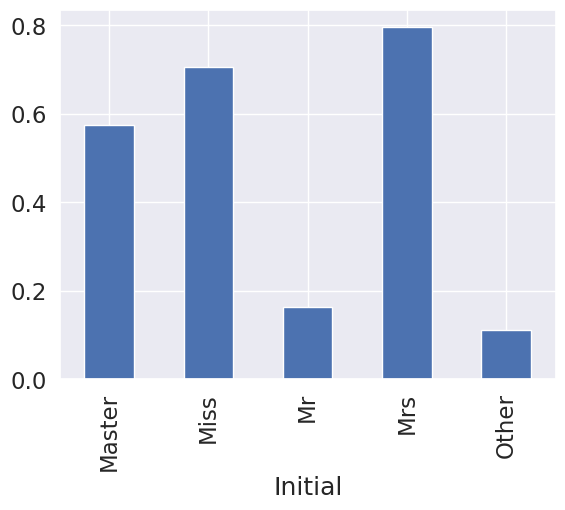

In [33]:
df_train.groupby("Initial")['Survived'].mean().plot.bar()

In [34]:
mean_age = df_train.groupby("Initial")["Age"].mean().to_dict()
for k, v in mean_age.items():
    df_train.loc[(df_train.Age.isnull()) & (df_train.Initial==k), "Age"] = round(v)
    df_test.loc[(df_test.Age.isnull()) & (df_test.Initial==k), "Age"] = round(v)

## fill missing embarked

In [35]:
print(df_train["Embarked"].isnull().sum())

2


In [36]:
df_train[df_train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,4.382027,B28,NaN,1,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,4.382027,B28,NaN,1,Mrs


In [37]:
# 가장 많은 값으로 수정 
df_train["Embarked"].fillna("S", inplace=True)

In [38]:
print(df_train["Embarked"].isnull().sum())

0


## categorize Age

In [39]:
def categorize_age(x):
    return int(x // 10)

df_train["Age_cate"] = df_train["Age"].apply(categorize_age)
df_test["Age_cate"] = df_test["Age"].apply(categorize_age)

In [40]:
def normalize_age(x):
    return x / 80

df_train["Age_norm"] = df_train["Age"].apply(normalize_age)
df_test["Age_norm"] = df_test["Age"].apply(normalize_age)

## categorize Features

In [41]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [42]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

In [43]:
#Master	Miss	Mr	Mrs	Other
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Mr': 1, 'Mrs': 2, "Miss":3, "Other":4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Mr': 1, 'Mrs': 2, "Miss":3, "Other":4})

In [44]:
df_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
FamilySize     False
Initial        False
Age_cate       False
Age_norm       False
dtype: bool

In [45]:
df_test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
FamilySize     False
Initial        False
Age_cate       False
Age_norm       False
dtype: bool

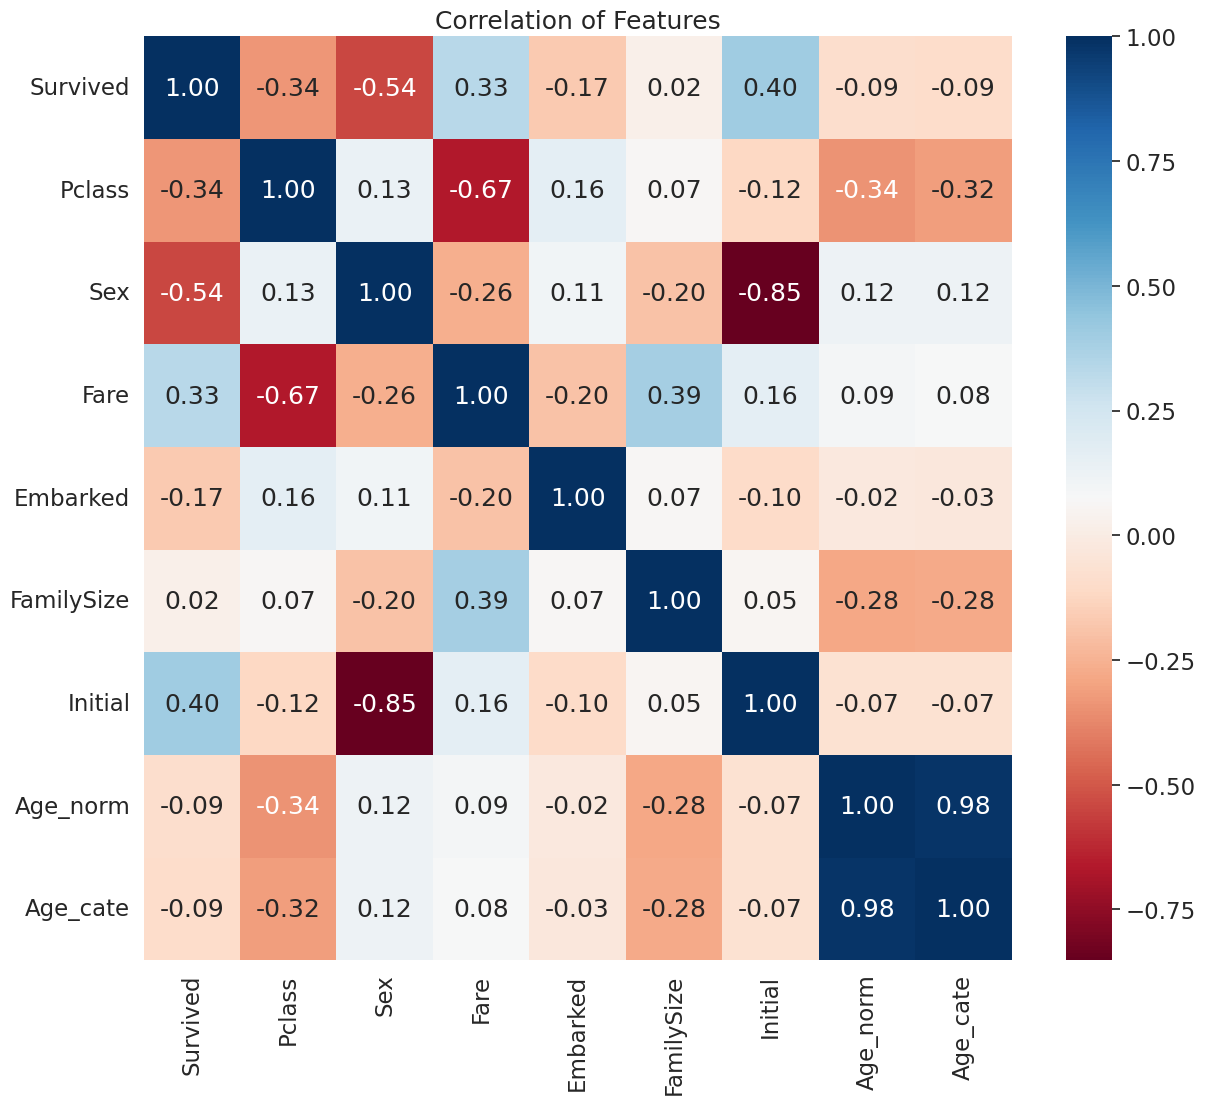

In [46]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_norm', 'Age_cate']] 
plt.figure(figsize=(14,12))
plt.title("Correlation of Features")
sns.heatmap(heatmap_data.corr(), annot=True, fmt=".2f", cmap="RdBu")
plt.show()

## one-hot encoding

In [121]:
# df_train = pd.get_dummies(df_train, columns=["Initial"], prefix="Initial")
# df_test = pd.get_dummies(df_test, columns=["Initial"], prefix="Initial")

In [122]:
# df_train = pd.get_dummies(df_train, columns=["Embarked"], prefix="Embarked")
# df_test = pd.get_dummies(df_test, columns=["Embarked"], prefix="Embarked")

In [118]:
df_train = pd.get_dummies(df_train, columns=["Age_cate"], prefix="Age_cate")
df_test = pd.get_dummies(df_test, columns=["Age_cate"], prefix="Age_cate")

## drop columns

In [153]:
# df_train_drop = df_train.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin", "Age", "Age_norm","Embarked", "Initial", "FamilySize"], axis=1)
# df_test_drop = df_test.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin", "Age", "Age_norm","Embarked", "Initial", "FamilySize"], axis=1)

df_train_drop = df_train[["Survived", "Pclass", "Sex", "Fare", "FamilySize","Age_norm"]]
df_test_drop = df_test[["Pclass", "Sex", "Fare", "FamilySize","Age_norm"]]

In [154]:
df_train_drop.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_norm
0,0,3,1,1.981001,2,0.2750
1,1,1,0,4.266662,2,0.4750
2,1,3,0,2.070022,1,0.3250
3,1,1,0,3.972177,2,0.4375
4,0,3,1,2.085672,1,0.4375


In [155]:
df_test_drop.head()

,Pclass,Sex,Fare,FamilySize,Age_norm
0,3,1,2.057860,2,0.43125
1,3,0,1.945910,2,0.58750
2,2,1,2.270836,1,0.77500
3,3,1,2.159003,2,0.33750
4,3,0,2.508582,1,0.27500


# Modeling

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [171]:
X_train = df_train_drop.drop("Survived", axis=1).values
target_label = df_train_drop["Survived"].values

X_test = df_test_drop.values

In [177]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

In [253]:
model = RandomForestClassifier(criterion="gini", max_depth=8, \
                               class_weight="balanced", n_estimators=350, \
                               random_state=1234)
model.fit(X_train, Y_train)
prediction = model.predict(X_valid)
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(Y_valid.shape[0], 100 * metrics.accuracy_score(prediction, Y_valid)))

총 268명 중 87.69% 정확도로 생존을 맞춤


In [254]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 350,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

* 튜토리얼: 83.96%
* Pclass, Sex, Fare, Embarked, FamilySize, Initial, Age_norm: 83.58% 
* Pclass, Sex, Fare, FamilySize, Initial, Age_norm: 83.96%
* Pclass, Sex, Fare, FamilySize, Age_norm: 85.82% 
* Pclass, Sex, Age_norm: 81.34%% 

----
* Pclass, Sex, Fare, FamilySize, Age_norm: 85.82% 
* Pclass, Sex, Fare, Age: 84.33%
* Pclass, Sex, Fare, Age, Age_cate: 85.82%
* Pclass, Sex, Fare, Age_cate: 82.09%
* Pclass, Sex, Fare, Age_cate(one-hot): 81.34%

----
* criterion: gini (85.82%), entorpy (83.96%), log_loss (85.07%)
* max_depth: None(83.58%) 8 (87.31%)
* n_estimators: 350 (87.69%)

In [255]:
from pandas import Series

feature_importance = model.feature_importances_
# feature_importance
Series_feat_imp = Series(feature_importance, df_test[["Pclass", "Sex", "Fare", "FamilySize","Age_norm"]].columns)

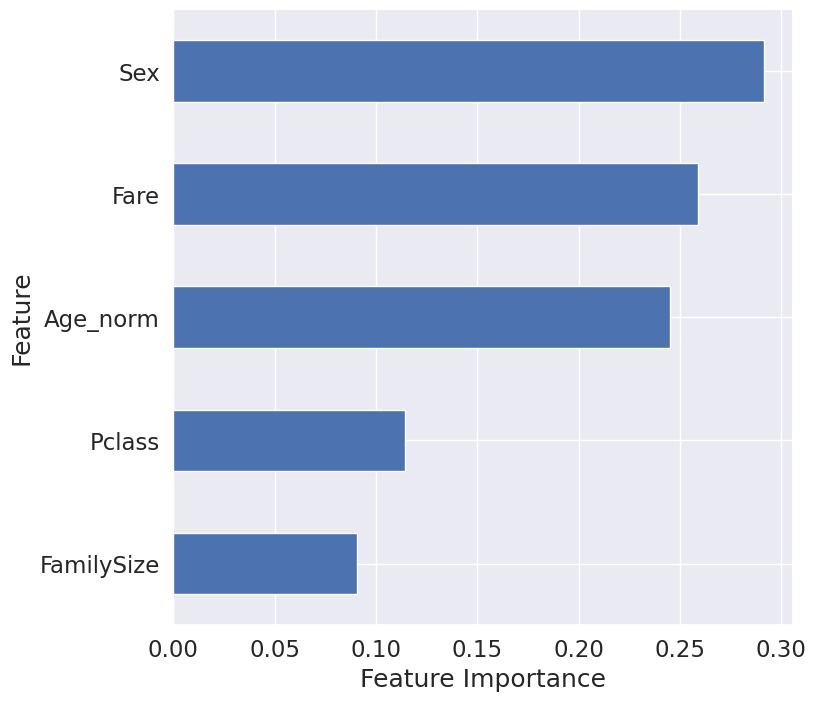

In [256]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

# Submission

In [257]:
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [258]:
prediction = model.predict(X_test)
submission["Survived"] = prediction

In [260]:
submission.to_csv('./submission.csv', index=False)